In [71]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.simplefilter("ignore")


In [72]:
## Load Dataset
df = pd.read_csv('Project Parking Data 2.csv')

df.shape


(380639, 7)

In [73]:
df.head()

,Make,Colour,Issue Date,Issue Time,Contravention Code,Location,PA_Details
0,0,NaN,q5,11:48,1,Blenheim Road,1464
1,0,NaN,q5,16:48,12,Geere Road,1464
2,Ford,Other,q5,13:06,12,Jupp Road West,999
3,Alfa Romeo,Blue,q5,13:10,2,Aaron Hill Road,999
4,Alfa Romeo,Bronze,q5,13:13,47,Aaron Hill Road,999


In [74]:
df['Issue Time'] = df['Issue Time'].str.split(':').str[0]
df.head()


,Make,Colour,Issue Date,Issue Time,Contravention Code,Location,PA_Details
0,0,NaN,q5,11,1,Blenheim Road,1464
1,0,NaN,q5,16,12,Geere Road,1464
2,Ford,Other,q5,13,12,Jupp Road West,999
3,Alfa Romeo,Blue,q5,13,2,Aaron Hill Road,999
4,Alfa Romeo,Bronze,q5,13,47,Aaron Hill Road,999


remove test states from location
remove cides with W
make 0 is invalid


In [75]:
df['Contravention Code'].unique().shape

(136,)

In [76]:
df['Contravention Code'].unique()

array(['1', '12', '2', '47', '6', '30', '86', '83', '21', '62', '92',
       '165', '01o', '99', '25', '19', '87', '11u', '48', '62g', '01a',
       '20', '16', '40', '05u', '27', '61', '82', '55', '85', '26', '23c',
       '165)', '80', '01o)', '11u)', 'W12', 'W62', '14', '23', '95',
       '23g', '54', '91', '5', '22', '81', '45', '73u', 'W02', '24',
       '82u', 'W01', '11', '35', '73', '80u', 'W90', 'W49', 'W23', 'W35',
       'W56', '62g)', 'W57', '5u)', '18', '49', '23s', '56', '28', '61g',
       '8', 'W91', 'W20', '4', '63', '10', 'W87', '23e', '71', '23p',
       'W05', 'W22', '61g)', 'W26', 'W11', 'W82', '89', '70', 'W27',
       '232', 'W10', 'W24', 'W54', 'W63', 'W61', 'W99', '96', '43', 'W30',
       'W25', '23r', 'W19', 'W92', 'W40', '164', 'W16', '73u)', 'W06',
       'W89', 'W45', 'W31', '9', '23d', '36', 'W21', 'W47', 'W08', 'W01A',
       'W48', 'W41', 'W46', 'W09', 'W42', '7', 'W04', 'W93', 'W14', 'W83',
       'W73', '93', 'W70', 'W55', '57', '82u)', 'W95'], dtype=

In [77]:
df = df[~df['Contravention Code'].str.contains('W')]

In [78]:
df = df[~df['Location'].str.contains('Test')]

In [79]:
df['Contravention Code'].unique().shape

(81,)

In [80]:
df['Contravention Code'].unique()


array(['1', '12', '2', '47', '6', '30', '86', '83', '21', '62', '92',
       '165', '01o', '99', '25', '19', '87', '11u', '48', '62g', '01a',
       '20', '16', '40', '05u', '27', '61', '82', '55', '85', '26', '23c',
       '165)', '80', '01o)', '11u)', '14', '23', '95', '23g', '54', '91',
       '5', '22', '81', '45', '73u', '24', '82u', '11', '35', '73', '80u',
       '62g)', '5u)', '18', '49', '23s', '56', '28', '61g', '8', '4',
       '63', '10', '23e', '71', '23p', '61g)', '89', '232', '43', '23r',
       '164', '73u)', '96', '36', '7', '93', '57', '82u)'], dtype=object)

In [81]:
df['Contravention Code'].unique().shape

(81,)

In [82]:
df['Contravention Code']=df['Contravention Code'].str.replace("u","")
df['Contravention Code']=df['Contravention Code'].str.replace("g","")
df['Contravention Code']=df['Contravention Code'].str.replace("a","")
df['Contravention Code']=df['Contravention Code'].str.replace("c","")
df['Contravention Code']=df['Contravention Code'].str.replace("o","")
df['Contravention Code']=df['Contravention Code'].str.replace(")","")
df['Contravention Code']=df['Contravention Code'].str.replace("d","")
df['Contravention Code']=df['Contravention Code'].str.replace("p","")
df['Contravention Code']=df['Contravention Code'].str.replace("e","")
df['Contravention Code']=df['Contravention Code'].str.replace("s","")
df['Contravention Code']=df['Contravention Code'].str.replace("r","")
df['Contravention Code'].unique()

array(['1', '12', '2', '47', '6', '30', '86', '83', '21', '62', '92',
       '165', '01', '99', '25', '19', '87', '11', '48', '20', '16', '40',
       '05', '27', '61', '82', '55', '85', '26', '23', '80', '14', '95',
       '54', '91', '5', '22', '81', '45', '73', '24', '35', '18', '49',
       '56', '28', '8', '4', '63', '10', '71', '89', '232', '43', '164',
       '96', '36', '7', '93', '57'], dtype=object)

In [83]:
df['Contravention Code'].unique().shape

(60,)

In [84]:
df.shape

(379456, 7)

In [85]:
df.head()

,Make,Colour,Issue Date,Issue Time,Contravention Code,Location,PA_Details
0,0,NaN,q5,11,1,Blenheim Road,1464
1,0,NaN,q5,16,12,Geere Road,1464
2,Ford,Other,q5,13,12,Jupp Road West,999
3,Alfa Romeo,Blue,q5,13,2,Aaron Hill Road,999
4,Alfa Romeo,Bronze,q5,13,47,Aaron Hill Road,999


In [86]:
df.dropna(inplace=True)
df.shape

(375880, 7)

In [87]:
df.drop(df.index[df['Make'] == 0], inplace = True)
df.shape

(375880, 7)

In [88]:
df['PA_Details']=df['PA_Details'].str.replace("PN","")
df['PA_Details']=df['PA_Details'].str.replace(")","")
df.drop(df.index[df['PA_Details'] == 'icpsadmin'], inplace = True)
df.drop(df.index[df['PA_Details'] == '999999999'], inplace = True)

In [89]:
df['PA_Details'].unique()

array(['999', '1438', '3289', '1281', '3287', '1252', '3293', '1309',
       '1498', '3301', '1482', '3296', '1381', '1146', '1490', '3216',
       '1453', '1458', '1419', '1478', '1481', '1142', '1387', '3302',
       '3295', '3303', '3300', '1440', '1313', '1522', '3235', '1418',
       '3247', '3292', '3191', '1519', '1456', '1306', '3237', '1499',
       '3291', '3299', '1463', '3156', '1278', '3264', '3283', '1434',
       '1473', '3225', '1489', '3298', '1468', '1461', '1485', '1442',
       '1410', '3266', '1518', '1520', '1523', '1145', '1491', '1351',
       '1462', '1454', '1515', '1464', '1516', '1433', '1503', '1506',
       '1514', '1517', '1475', '1331', '1508', '1507', '1435', '1409',
       '1401', '1486', '3260', '1407', '3269', '1424', '3245', '1484',
       '3239', '1466', '3278', '1488', '3229', '3179', '1465', '1247',
       '1494', '1521', '1502', '1524', '1505', '1497', '3285', '1492',
       '1495', '1493', '3255', '3268', '1447', '1500', '1457', '1035',
       

In [90]:
df.head(20)

,Make,Colour,Issue Date,Issue Time,Contravention Code,Location,PA_Details
2,Ford,Other,q5,13,12,Jupp Road West,999
3,Alfa Romeo,Blue,q5,13,2,Aaron Hill Road,999
4,Alfa Romeo,Bronze,q5,13,47,Aaron Hill Road,999
5,Mercedes Benz,Black,q5,11,1,Goldsmith Avenue,1438
6,Volkswagen,Other,q5,11,1,Shelley Avenue,1438
7,Toyota,Silver,q5,12,6,High Street North,1438
8,Vauxhall,Other,q5,14,6,Stanley Road E12,1438
9,Mercedes Benz,Silver,q5,14,1,Shelley Avenue,1438
10,Mercedes Benz,Black,q5,15,6,High Street North,1438
11,Volkswagen,Other,q5,16,30,High Street North,1438


In [91]:
df['Issue Date']=df['Issue Date'].str.replace("q1","Q1Y1")
df['Issue Date']=df['Issue Date'].str.replace("q2","Q2Y1")
df['Issue Date']=df['Issue Date'].str.replace("q3","Q3Y1")
df['Issue Date']=df['Issue Date'].str.replace("q4","Q4Y1")
df['Issue Date']=df['Issue Date'].str.replace("q5","Q1Y2")
df['Issue Date']=df['Issue Date'].str.replace("q6","Q2Y2")
df['Issue Date']=df['Issue Date'].str.replace("q7","Q3Y2")
df['Issue Date']=df['Issue Date'].str.replace("q8","Q4Y2")
df['Issue Date']=df['Issue Date'].str.replace("q9","Q1Y3")
df['Issue Date']=df['Issue Date'].str.replace("q10","Q2Y3")
df['Issue Date']=df['Issue Date'].str.replace("q11","Q3Y3")
df['Issue Date']=df['Issue Date'].str.replace("q12","Q4Y3")
df.head()

,Make,Colour,Issue Date,Issue Time,Contravention Code,Location,PA_Details
2,Ford,Other,Q1Y2,13,12,Jupp Road West,999
3,Alfa Romeo,Blue,Q1Y2,13,2,Aaron Hill Road,999
4,Alfa Romeo,Bronze,Q1Y2,13,47,Aaron Hill Road,999
5,Mercedes Benz,Black,Q1Y2,11,1,Goldsmith Avenue,1438
6,Volkswagen,Other,Q1Y2,11,1,Shelley Avenue,1438


In [92]:
df['Issue Time']=df['Issue Time'].astype(str).astype(int)
df['Contravention Code']=df['Contravention Code'].astype(str).astype(int)
df['PA_Details']=df['PA_Details'].astype(str).astype(int)

In [93]:
df.to_csv('Processed.csv')

In [23]:
df_categorical = df[['Make','Colour',	'Issue Date',	'Location']]
df_numerical = df[['Issue Time','Contravention Code','PA_Details']]

In [24]:
df_categorical.head(), df_numerical.head()

(            Make  Colour Issue Date          Location
 2           Ford   Other       Q1Y2    Jupp Road West
 3     Alfa Romeo    Blue       Q1Y2   Aaron Hill Road
 4     Alfa Romeo  Bronze       Q1Y2   Aaron Hill Road
 5  Mercedes Benz   Black       Q1Y2  Goldsmith Avenue
 6     Volkswagen   Other       Q1Y2    Shelley Avenue,
   Issue Time Contravention Code PA_Details
 2         13                 12        999
 3         13                  2        999
 4         13                 47        999
 5         11                  1       1438
 6         11                  1       1438)

In [94]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375869 entries, 2 to 380638
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Issue Time          375869 non-null  int64
 1   Contravention Code  375869 non-null  int64
 2   PA_Details          375869 non-null  int64
 3   clusters_k_means    375869 non-null  int32
dtypes: int32(1), int64(3)
memory usage: 21.0 MB


Text(0.5, 1.0, 'Elbow Method For Optimal k')

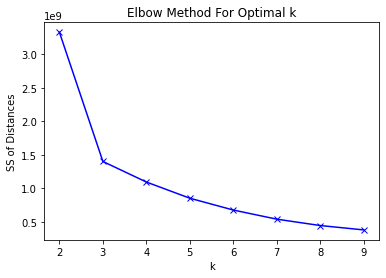

In [27]:
#Finding Best k using WSSE 
from sklearn.cluster import KMeans
SS_distances= []
I = range(2,10)
for i in I:
       k_means = KMeans(n_clusters=i)
       k_means= k_means.fit(df_numerical)
       SS_distances.append(k_means.inertia_)
   
centers = k_means.cluster_centers_

# plotting SSE distances (for each point to the nearest Center) versus number of k 
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SS of Distances')
plt.title('Elbow Method For Optimal k')

In [28]:
k_means = KMeans(n_clusters=3)
k_means= k_means.fit(df_numerical)
labels = k_means.labels_
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([241777,  80952,  53140]))

In [29]:
centers=k_means.cluster_centers_

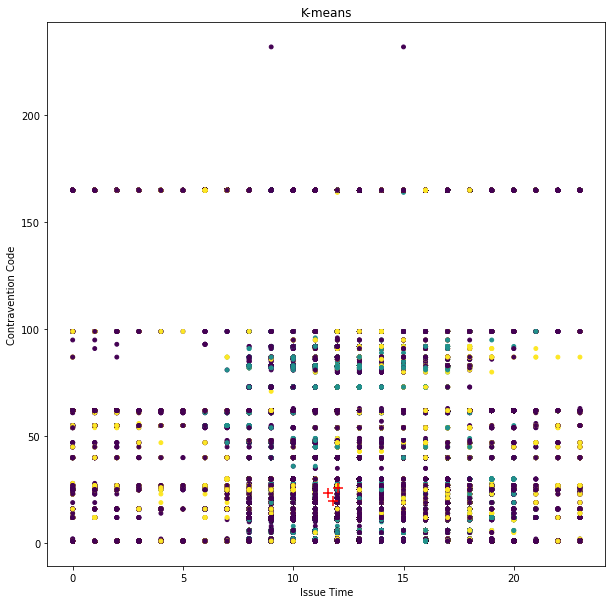

In [30]:
# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(10,10))
plt.scatter(df_numerical['Issue Time'],df_numerical['Contravention Code'],c=labels,s=15)
plt.scatter(centers[:,0], centers[:,1], color ='red', marker='+', s=100) 
plt.xlabel('Issue Time')
plt.ylabel('Contravention Code')
plt.title('K-means')
plt.show()

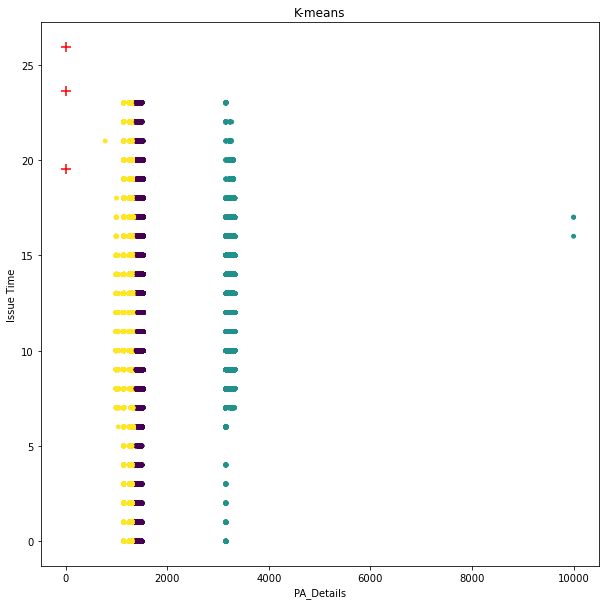

In [31]:


# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(10,10))
plt.scatter(df_numerical['PA_Details'],df_numerical['Issue Time'],c=labels,s=15)
plt.scatter(centers[:,0], centers[:,1], color ='red', marker='+', s=100) 
plt.xlabel('PA_Details')
plt.ylabel('Issue Time')
plt.title('K-means')
plt.show()

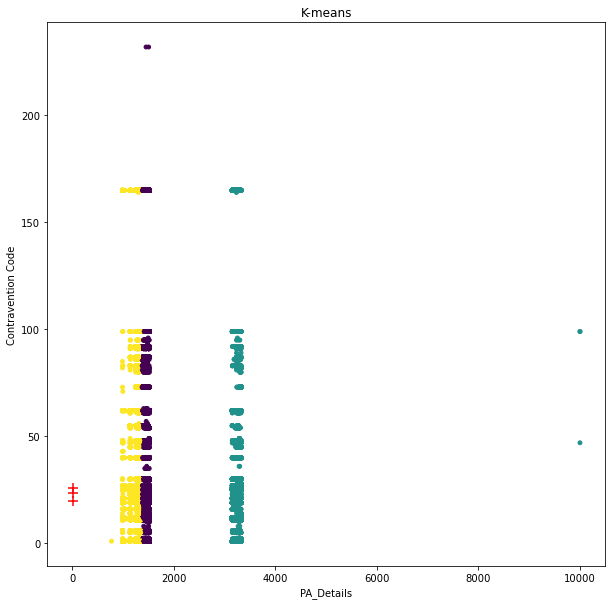

In [32]:
# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(10,10))
plt.scatter(df_numerical['PA_Details'],df_numerical['Contravention Code'],c=labels,s=15)
plt.scatter(centers[:,0], centers[:,1], color ='red', marker='+', s=100) 
plt.xlabel('PA_Details')
plt.ylabel('Contravention Code')
plt.title('K-means')
plt.show()

In [33]:
df_numerical.head()

,Issue Time,Contravention Code,PA_Details
2,13,12,999
3,13,2,999
4,13,47,999
5,11,1,1438
6,11,1,1438


In [34]:
df_numerical.iloc[:,0:3]

,Issue Time,Contravention Code,PA_Details
2,13,12,999
3,13,2,999
4,13,47,999
5,11,1,1438
6,11,1,1438
...,...,...,...
380634,12,1,1498
380635,12,1,1498
380636,12,12,1498
380637,12,165,1498


In [35]:
df_numerical['clusters_k_means'] = labels
df_numerical.head()

,Issue Time,Contravention Code,PA_Details,clusters_k_means
2,13,12,999,2
3,13,2,999,2
4,13,47,999,2
5,11,1,1438,0
6,11,1,1438,0


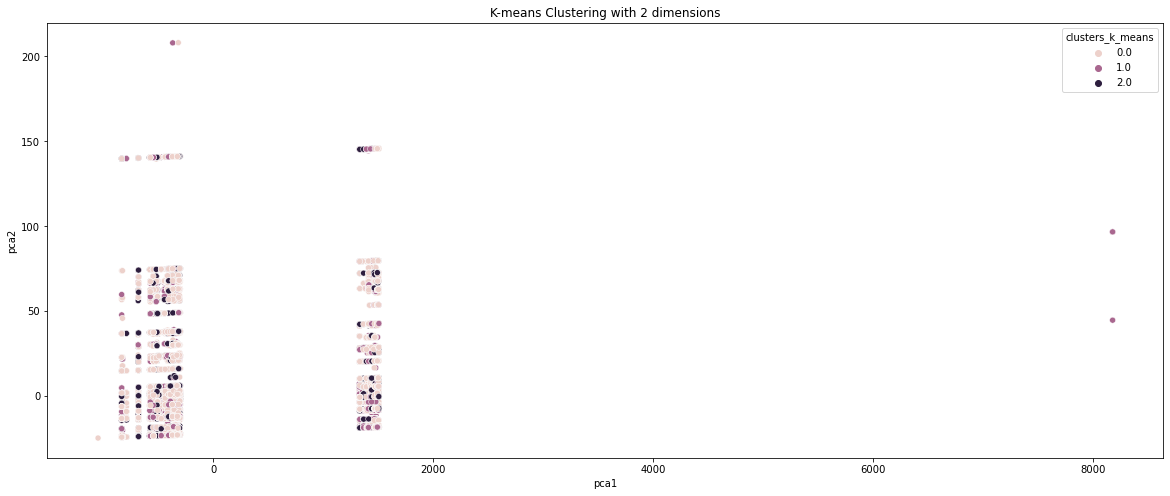

In [36]:
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_numerical.iloc[:,0:3])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
plt.figure(figsize=(20,8))
sns.scatterplot(x="pca1", y="pca2", hue=df_numerical['clusters_k_means'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

Text(0.5, 0, 'PA_Details')

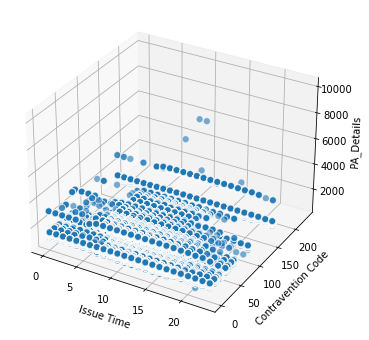

In [37]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df_numerical['Issue Time']
ys = df_numerical['Contravention Code']
zs = df_numerical['PA_Details']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Issue Time')
ax.set_ylabel('Contravention Code')
ax.set_zlabel('PA_Details')

In [38]:
# Import module for k-protoype cluster
from kmodes.kmodes import KModes

In [39]:
df_categorical.head()

,Make,Colour,Issue Date,Location
2,Ford,Other,Q1Y2,Jupp Road West
3,Alfa Romeo,Blue,Q1Y2,Aaron Hill Road
4,Alfa Romeo,Bronze,Q1Y2,Aaron Hill Road
5,Mercedes Benz,Black,Q1Y2,Goldsmith Avenue
6,Volkswagen,Other,Q1Y2,Shelley Avenue


In [40]:
# Choosing optimal K
cost = []
for cluster in range(2, 6):
    try:
        kmodes = KModes(n_clusters = cluster)
        kmodes.fit_predict(df_categorical)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(2, 6), 'Cost': cost})

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


In [41]:
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')

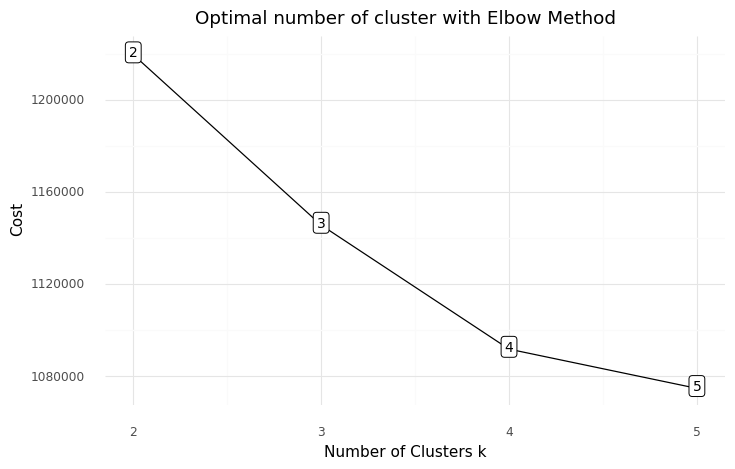

<ggplot: (8781185112561)>

In [42]:

# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [43]:
kmodes = KModes(n_clusters = 4)
kmodes.fit_predict(df_categorical)
cost=kmodes.cost_
labels_kmode = kmodes.labels_

In [44]:
labels_kmode

array([3, 3, 3, ..., 0, 1, 1], dtype=uint16)

In [45]:
np.unique(labels_kmode, return_counts = True)

(array([0, 1, 2, 3], dtype=uint16), array([183856,  86006,  61542,  44465]))

In [97]:
df.head()

,Make,Colour,Issue Date,Issue Time,Contravention Code,Location,PA_Details
2,Ford,Other,Q1Y2,13,12,Jupp Road West,999
3,Alfa Romeo,Blue,Q1Y2,13,2,Aaron Hill Road,999
4,Alfa Romeo,Bronze,Q1Y2,13,47,Aaron Hill Road,999
5,Mercedes Benz,Black,Q1Y2,11,1,Goldsmith Avenue,1438
6,Volkswagen,Other,Q1Y2,11,1,Shelley Avenue,1438


In [96]:
df_new=df

In [98]:
df_new['clusters_k_means'] = labels
df_new['clusters_k_mode'] = labels_kmode
df_new.head()

,Make,Colour,Issue Date,Issue Time,Contravention Code,Location,PA_Details,clusters_k_means,clusters_k_mode
2,Ford,Other,Q1Y2,13,12,Jupp Road West,999,2,3
3,Alfa Romeo,Blue,Q1Y2,13,2,Aaron Hill Road,999,2,3
4,Alfa Romeo,Bronze,Q1Y2,13,47,Aaron Hill Road,999,2,3
5,Mercedes Benz,Black,Q1Y2,11,1,Goldsmith Avenue,1438,0,0
6,Volkswagen,Other,Q1Y2,11,1,Shelley Avenue,1438,0,3


In [99]:
df.head()

,Make,Colour,Issue Date,Issue Time,Contravention Code,Location,PA_Details,clusters_k_means,clusters_k_mode
2,Ford,Other,Q1Y2,13,12,Jupp Road West,999,2,3
3,Alfa Romeo,Blue,Q1Y2,13,2,Aaron Hill Road,999,2,3
4,Alfa Romeo,Bronze,Q1Y2,13,47,Aaron Hill Road,999,2,3
5,Mercedes Benz,Black,Q1Y2,11,1,Goldsmith Avenue,1438,0,0
6,Volkswagen,Other,Q1Y2,11,1,Shelley Avenue,1438,0,3


In [49]:
from kmodes.kprototypes import KPrototypes

In [51]:
df.head()

,Make,Colour,Issue Date,Issue Time,Contravention Code,Location,PA_Details,clusters_k_means,clusters_k_mode
2,Ford,Other,Q1Y2,13,12,Jupp Road West,999,2,3
3,Alfa Romeo,Blue,Q1Y2,13,2,Aaron Hill Road,999,2,3
4,Alfa Romeo,Bronze,Q1Y2,13,47,Aaron Hill Road,999,2,3
5,Mercedes Benz,Black,Q1Y2,11,1,Goldsmith Avenue,1438,0,0
6,Volkswagen,Other,Q1Y2,11,1,Shelley Avenue,1438,0,3


In [100]:
df =df.iloc[:,0:7]
df.head()

,Make,Colour,Issue Date,Issue Time,Contravention Code,Location,PA_Details
2,Ford,Other,Q1Y2,13,12,Jupp Road West,999
3,Alfa Romeo,Blue,Q1Y2,13,2,Aaron Hill Road,999
4,Alfa Romeo,Bronze,Q1Y2,13,47,Aaron Hill Road,999
5,Mercedes Benz,Black,Q1Y2,11,1,Goldsmith Avenue,1438
6,Volkswagen,Other,Q1Y2,11,1,Shelley Avenue,1438


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375869 entries, 2 to 380638
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Make                375869 non-null  object
 1   Colour              375869 non-null  object
 2   Issue Date          375869 non-null  object
 3   Issue Time          375869 non-null  int64 
 4   Contravention Code  375869 non-null  int64 
 5   Location            375869 non-null  object
 6   PA_Details          375869 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 22.9+ MB


In [102]:
# Inspect the categorical variables
df.select_dtypes('object').nunique()

Make           210
Colour          60
Issue Date      13
Location      1631
dtype: int64

In [103]:
# Inspect the numerical variables
df.describe()

,Issue Time,Contravention Code,PA_Details
count,375869.000000,375869.000000,375869.000000
mean,11.698749,23.073507,1823.647766
std,3.525302,34.907346,758.566191
min,0.000000,1.000000,777.000000
25%,9.000000,2.000000,1433.000000
50%,11.000000,12.000000,1468.000000
75%,14.000000,21.000000,1519.000000
max,23.000000,232.000000,9999.000000


In [104]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Make', 'Colour', 'Issue Date', 'Location']
Categorical columns position  : [0, 1, 2, 5]


In [105]:
# Convert dataframe to matrix
dfMatrix = df.to_numpy()
dfMatrix

array([['Ford', 'Other', 'Q1Y2', ..., 12, 'Jupp Road West', 999],
       ['Alfa Romeo', 'Blue', 'Q1Y2', ..., 2, 'Aaron Hill Road', 999],
       ['Alfa Romeo', 'Bronze', 'Q1Y2', ..., 47, 'Aaron Hill Road', 999],
       ...,
       ['Ford', 'Black', 'Q1Y3', ..., 12, 'Castle Street', 1498],
       ['Audi', 'White', 'Q1Y3', ..., 165, 'Boleyn Road', 1498],
       ['Mercedes', 'White', 'Q1Y3', ..., 1, 'Jephson Road', 1498]],
      dtype=object)

In [108]:
kprototype = KPrototypes(n_clusters = 4)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)


Cluster initiation: 3


In [111]:
labels_kprototype = kprototype.labels_

In [112]:
df_new['clusters_k_prototype'] = labels_kprototype
df_new.head()

,Make,Colour,Issue Date,Issue Time,Contravention Code,Location,PA_Details,clusters_k_means,clusters_k_mode,clusters_k_prototype
2,Ford,Other,Q1Y2,13,12,Jupp Road West,999,2,3,2
3,Alfa Romeo,Blue,Q1Y2,13,2,Aaron Hill Road,999,2,3,2
4,Alfa Romeo,Bronze,Q1Y2,13,47,Aaron Hill Road,999,2,3,2
5,Mercedes Benz,Black,Q1Y2,11,1,Goldsmith Avenue,1438,0,0,1
6,Volkswagen,Other,Q1Y2,11,1,Shelley Avenue,1438,0,3,1


In [113]:
df_new.to_csv('clustered_data.csv')